In [1]:
import pandas
import matplotlib.pyplot as plt
data = pandas.read_csv('titanic_data.csv')

for column in data:
    print column

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [2]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
flag = False
for entry in data['Survived']:
    if entry not in [0, 1]:
        print entry
        flag = True
if flag == False:
    print 'No inconsistent data'

No inconsistent data


In [5]:
flag = False
for entry in data['Pclass']:
    if entry not in [1, 2, 3]:
        print entry
        flag = True
if flag == False:
    print 'No inconsistent data'

No inconsistent data


In [6]:
flag = False
for entry in data['Sex']:
    if entry not in ['male','female']:
        print entry
        flag = True
if flag == False:
    print 'No inconsistent data'

No inconsistent data


In [7]:
flag = False
for entry in data['Embarked']:
    if entry not in ('C','Q','S'):
        print entry
        flag = True
if flag == False:
    print 'No inconsistent data'

nan
nan


In [8]:
flag = False
duplicates = data.duplicated()
for duplicate in duplicates:
    if duplicate=='True':
        print 'Duplicated Exists'
        flag = True
if flag==False:
    print 'No Duplicates'

No Duplicates


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
titanic_data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic_data.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [11]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
missing_age_bool = pandas.isnull(titanic_data['Age'])
titanic_data[missing_age_bool].head()

Survived  Pclass     Sex  Age  SibSp  Parch     Fare Embarked
5          0       3    male  NaN      0      0   8.4583        Q
17         1       2    male  NaN      0      0  13.0000        S
19         1       3  female  NaN      0      0   7.2250        C
26         0       3    male  NaN      0      0   7.2250        C
28         1       3  female  NaN      0      0   7.8792        Q

In [13]:
missing_age_male = titanic_data[missing_age_bool]['Sex']=='male'
missing_age_female = titanic_data[missing_age_bool]['Sex']=='female'
print 'Number of missing age of male - ',missing_age_male.sum()
print 'Number of missing age of female - ',missing_age_female.sum()

Number of missing age of male -  124
Number of missing age of female -  53


In [14]:
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [15]:
youngest_to_survive = titanic_data[titanic_data['Survived'] == 1]['Age'].min()
youngest_to_die = titanic_data[titanic_data['Survived'] == 0]['Age'].min()
oldest_to_survive = titanic_data[titanic_data['Survived'] == 1]['Age'].max()
oldest_to_die = titanic_data[titanic_data['Survived'] == 0]['Age'].max()

print 'Youngest_to_survive - ',youngest_to_survive
print 'Youngest_to_die - ',youngest_to_die
print 'Oldest_to_survive - ',oldest_to_survive
print 'Oldest_to_die - ',oldest_to_die

Youngest_to_survive -  0.42
Youngest_to_die -  1.0
Oldest_to_survive -  80.0
Oldest_to_die -  74.0


In [16]:
group_by_class_survival = titanic_data.groupby(['Pclass', 'Survived', 'Sex']).size()
print group_by_class_survival

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64


In [17]:
def survival(pclass, sex):
    group_by_class = titanic_data.groupby(['Pclass', 'Sex']).size()[pclass, sex].astype('float')
    group_by_class_survived = titanic_data.groupby(['Pclass', 'Survived', 'Sex']).size()[pclass, 1, sex].astype('float')
    
    print 'Total numbers of',sex,'of class',pclass,'-',group_by_class
    print 'Total numbers of',sex,'of class',pclass,'who survived -',group_by_class_survived
    survival_rate = ((group_by_class_survived/group_by_class)*100).round(2)
    return survival_rate
    print '\n\n'
    
print 'Effect of social economy in survival rate : \n'
print 'Class 1 - Male survival rate :\n',survival(1, 'male'),'%\n'
print 'Class 1 - Female survival rate \n:',survival(1, 'female'),'%\n'
print '-------------\n'
print 'Class 2 - Male survival rate :\n',survival(2, 'male'),'%\n'
print 'Class 2 - Female survival rate:\n',survival(2, 'female'),'%\n'
print '-------------\n'
print 'Class 3 - Male survival rate :\n',survival(3, 'male'),'%\n'
print 'Class 3 - Female survival rate :\n',survival(3, 'female'),'%\n'

Effect of social economy in survival rate : 

Class 1 - Male survival rate :
Total numbers of male of class 1 - 122.0
Total numbers of male of class 1 who survived - 45.0
36.89 %

Class 1 - Female survival rate 
: Total numbers of female of class 1 - 94.0
Total numbers of female of class 1 who survived - 91.0
96.81 %

-------------

Class 2 - Male survival rate :
Total numbers of male of class 2 - 108.0
Total numbers of male of class 2 who survived - 17.0
15.74 %

Class 2 - Female survival rate:
Total numbers of female of class 2 - 76.0
Total numbers of female of class 2 who survived - 70.0
92.11 %

-------------

Class 3 - Male survival rate :
Total numbers of male of class 3 - 347.0
Total numbers of male of class 3 who survived - 47.0
13.54 %

Class 3 - Female survival rate :
Total numbers of female of class 3 - 144.0
Total numbers of female of class 3 who survived - 72.0
50.0 %



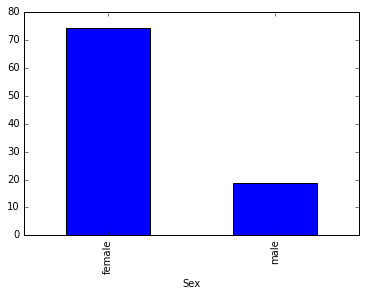

In [18]:
%matplotlib inline
titanic_data_survived = titanic_data
titanic_data_survived_grouped = titanic_data_survived.groupby(['Sex']).Survived.mean()*100
titanic_data_survived_grouped.plot(kind = 'bar')

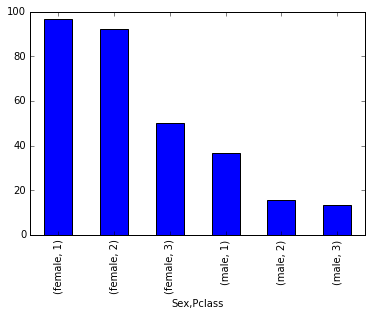

In [19]:
titanic_data_survived = titanic_data
titanic_data_survived_grouped = titanic_data_survived.groupby(['Sex', 'Pclass']).Survived.mean()*100
titanic_data_survived_grouped.plot(kind = 'bar')

In [20]:
age_below_18 = len(titanic_data[titanic_data['Age']<18])
print 'Total number of passengers below 18 :',age_below_18
age_below_18_survived = len(titanic_data[titanic_data['Age']<18][titanic_data['Survived']==1])
print 'Total number of passengers below 18 who survived :',age_below_18_survived
print '\n'

age_below_50 = len(titanic_data[titanic_data['Age']>18][titanic_data['Age']<50])
print 'Total number of passengers below 50 :',age_below_50
age_below_50_survived = len(titanic_data[titanic_data['Age']>18][titanic_data['Age']<50][titanic_data['Survived']==1])
print 'Total number of passengers below 50 who survived :',age_below_50_survived
print '\n'

age_above_50 = len(titanic_data[titanic_data['Age']>50])
print 'Total number of passengers above 50 :',age_above_50
age_above_50_survived = len(titanic_data[titanic_data['Age']>50][titanic_data['Survived']==1])
print 'Total number of passengers above 50 who survived :',age_above_50_survived
print '\n'

print 'Below 18 survival rate :',((float(age_below_18_survived)/age_below_18)*100)
print 'Between 18 and 50 survival rate :',((float(age_below_50_survived)/age_below_50)*100)
print 'Above 50 survival rate :',((float(age_above_50_survived)/age_above_50)*100)

Total number of passengers below 18 : 113
Total number of passengers below 18 who survived : 61


Total number of passengers below 50 : 501
Total number of passengers below 50 who survived : 193


Total number of passengers above 50 : 64
Total number of passengers above 50 who survived : 22


Below 18 survival rate : 53.982300885
Between 18 and 50 survival rate : 38.5229540918
Above 50 survival rate : 34.375


H:\Anaconda-Python\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
H:\Anaconda-Python\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
H:\Anaconda-Python\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
H:\Anaconda-Python\lib\site-packages\ipykernel\__main__.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [21]:
print 'Number of missing age values of Male :',missing_age_male.sum()
print 'Number of missing age values of Female :',missing_age_female.sum()

Number of missing age values of Male : 124
Number of missing age values of Female : 53


In [22]:
cleaned_age_data = titanic_data.dropna()
total_survivors = cleaned_age_data[cleaned_age_data['Survived']==1]['Age'].count()
total_non_survivors = cleaned_age_data[cleaned_age_data['Survived']==0]['Age'].count()
total_survivors_mean = cleaned_age_data[cleaned_age_data['Survived']==1]['Age'].mean()
total_non_survivors_mean = cleaned_age_data[cleaned_age_data['Survived']==0]['Age'].mean()

print 'Total Survivors : ',total_survivors
print 'Total Non-Survivors :',total_non_survivors
print 'Total Survivors Mean Age:',total_survivors_mean
print 'Total Non-Survivors Mean Age:',total_non_survivors_mean

Total Survivors :  288
Total Non-Survivors : 424
Total Survivors Mean Age: 28.1932986111
Total Non-Survivors Mean Age: 30.6261792453


In [23]:
cleaned_age_data.loc[(cleaned_age_data['Age']<18),'Age_Category'] = 'Young Aged'
cleaned_age_data.loc[(cleaned_age_data['Age']>17) & (cleaned_age_data['Age']<50),'Age_Category'] = 'Middle Aged'
cleaned_age_data.loc[(cleaned_age_data['Age']>50),'Age_Category'] = 'Old Aged'

cleaned_age_data.head()

H:\Anaconda-Python\lib\site-packages\pandas\core\indexing.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
H:\Anaconda-Python\lib\site-packages\pandas\core\indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked Age_Category
0         0       3    male  22.0      1      0   7.2500        S  Middle Aged
1         1       1  female  38.0      1      0  71.2833        C  Middle Aged
2         1       3  female  26.0      0      0   7.9250        S  Middle Aged
3         1       1  female  35.0      1      0  53.1000        S  Middle Aged
4         0       3    male  35.0      0      0   8.0500        S  Middle Aged

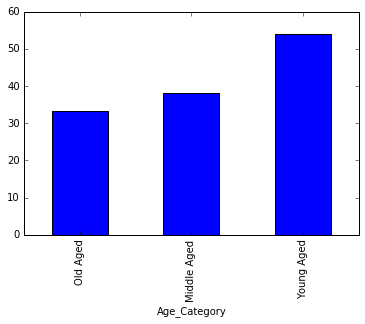

In [24]:
titanic_data_grouped_by_age_category = cleaned_age_data
titanic_data_survival_by_age = (titanic_data_grouped_by_age_category.groupby(['Age_Category']).Survived.mean()*100).sort_values()
titanic_data_survival_by_age.plot(kind = 'bar')

In [25]:
cleaned_age_data.loc[((cleaned_age_data['Sex']=='female') & (cleaned_age_data['Age']>=18)), 'Category'] = 'Woman'
cleaned_age_data.loc[(cleaned_age_data['Sex']=='male') & (cleaned_age_data['Age']>=18), 'Category'] = 'Man'
cleaned_age_data.loc[(cleaned_age_data['Age'] < 18),'Category'] = 'Child'

cleaned_age_data.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
0         0       3    male  22.0      1      0   7.2500        S   
1         1       1  female  38.0      1      0  71.2833        C   
2         1       3  female  26.0      0      0   7.9250        S   
3         1       1  female  35.0      1      0  53.1000        S   
4         0       3    male  35.0      0      0   8.0500        S   

  Age_Category Category  
0  Middle Aged      Man  
1  Middle Aged    Woman  
2  Middle Aged    Woman  
3  Middle Aged    Woman  
4  Middle Aged      Man

In [26]:
print cleaned_age_data.groupby(['Category', 'Survived']).size()

Category  Survived
Child     0            52
          1            61
Man       0           325
          1            70
Woman     0            47
          1           157
dtype: int64


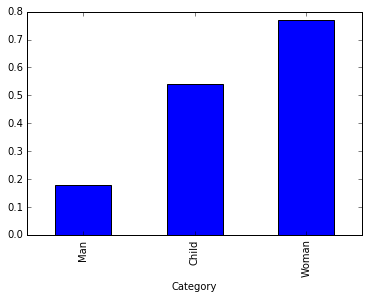

In [27]:
cleaned_age_grouped_by_category = cleaned_age_data.groupby('Category')
cleaned_age_grouped_by_category_survival = cleaned_age_grouped_by_category.Survived.mean().sort_values()
cleaned_age_grouped_by_category_survival.plot(kind = 'bar')

In [28]:
children_with_nanny = cleaned_age_data[cleaned_age_data['Category']=='Child'][cleaned_age_data['Parch']==0]
children_with_parents = cleaned_age_data[cleaned_age_data['Category']=='Child'][cleaned_age_data['Parch'] > 0]

print 'Number of childern with nanny:',children_with_nanny['Survived'].count()
print 'Number of childern with nanny who survived:',children_with_nanny[children_with_nanny['Survived']==1]['Survived'].count()

print 'Number of childern with nanny:',children_with_parents['Survived'].count()
print 'Number of childern with nanny who survived:',\
children_with_parents[children_with_parents['Survived']==1]['Survived'].count()

Number of childern with nanny: 32
Number of childern with nanny who survived: 16
Number of childern with nanny: 81
Number of childern with nanny who survived: 45


H:\Anaconda-Python\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
H:\Anaconda-Python\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [29]:
print 'Percentage of children who survived with nanny:',\
(float(children_with_nanny[children_with_nanny['Survived']==1]['Survived'].count())/children_with_nanny['Survived'].count())*100

print 'Mean age of children who survived with nanny:',\
children_with_nanny[children_with_nanny['Survived']==1]['Age'].mean()

Percentage of children who survived with nanny: 50.0
Mean age of children who survived with nanny: 14.6875


In [30]:
print 'Percentage of children who survived with parents:',\
(float(children_with_parents[children_with_parents['Survived']==1]['Survived'].count())/\
children_with_parents['Survived'].count())*100

print 'Mean age of children who survived with parents:',\
children_with_parents[children_with_parents['Survived']==1]['Age'].mean()

Percentage of children who survived with parents: 55.5555555556
Mean age of children who survived with parents: 5.47044444444


In [31]:
cleaned_age_data.loc[((cleaned_age_data['Parch']==0) & (cleaned_age_data['Category']=='Child')), 'nanny_parents'] = 'With_nanny'
cleaned_age_data.loc[((cleaned_age_data['Parch']>0) & (cleaned_age_data['Category']=='Child')),'nanny_parents']='Without_nanny'

cleaned_age_data.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
0         0       3    male  22.0      1      0   7.2500        S   
1         1       1  female  38.0      1      0  71.2833        C   
2         1       3  female  26.0      0      0   7.9250        S   
3         1       1  female  35.0      1      0  53.1000        S   
4         0       3    male  35.0      0      0   8.0500        S   

  Age_Category Category nanny_parents  
0  Middle Aged      Man           NaN  
1  Middle Aged    Woman           NaN  
2  Middle Aged    Woman           NaN  
3  Middle Aged    Woman           NaN  
4  Middle Aged      Man           NaN

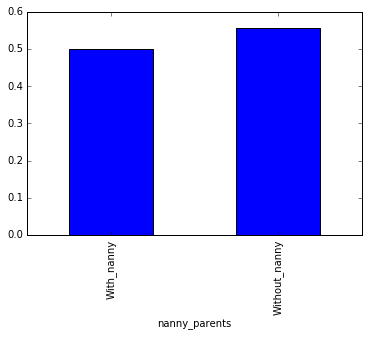

In [32]:
cleaned_age_data_nanny_group = cleaned_age_data.groupby('nanny_parents').Survived.mean()
cleaned_age_data_nanny_group.plot(kind = 'bar')

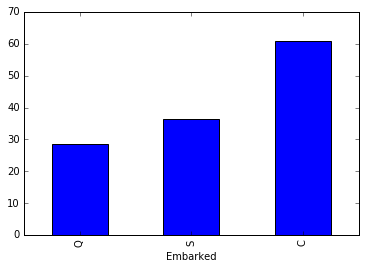

In [33]:
data_embarked_group = (cleaned_age_data.groupby('Embarked').Survived.mean()*100).sort_values()
data_embarked_group.plot(kind = 'bar')